In [1]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [2]:
#Get the data from local repository

url = 'https://raw.githubusercontent.com/poojitha/TwitterSentimentAnalysis/main/Rawdata/Corona_NLP_test.csv'

df_raw = pd.read_csv(url,index_col=0)


In [3]:
df_raw.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
# get Number of Rows and Number of Columns

print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 3798
Number of Columns: 5


In [5]:
#let us check if we have any null values in the data

# we found that there are 834 rows in location has null values, any way we are working on sentiment analysis and location does not
#impact in finding the sentiment unless if we need to caliculate what % of each location has -ve or +ve sentiment.

# however we can delete the rows which has null entries, and focus on 'OriginalTweet' Attribute to understand the sentiment of the tweet.

df_raw.isnull().sum()




ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [6]:
# droping NaN rows

df_raw.dropna(inplace = True)


In [7]:
print("Number of Rows: {}\nNumber of Columns: {}".format(df_raw.shape[0], df_raw.shape[1]))

Number of Rows: 2964
Number of Columns: 5


In [8]:
df_raw.index= pd.RangeIndex(start=1, stop=1+len(df_raw), step=1)

In [9]:
df_raw.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral


In [10]:
#let us check if we have any duplicate values in the data
df_raw.duplicated().sum()


0

In [11]:
df_raw.to_csv('cleanData.csv',index=False)

In [12]:
df_OriginalTweet =df_raw['OriginalTweet']

In [13]:
#removing special characters
#removing URLS in the string
#converting to lowercase
#stopwords removal


from nltk.corpus import stopwords
import re



stopwords = set(stopwords.words("english"))
corpus = []
for i in range(1, len(df_OriginalTweet)):
  review = re.sub(r"https?:[^\s]+", " " ,df_OriginalTweet[i])
  review = re.sub('[^a-zA-Z]',' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

In [14]:
print(corpus)

['trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock', 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices', 'panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc', 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper', 'remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc', 'drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus', 'anyone supermarket last days went normal sho

In [15]:
# converting the list to sentance for tokenization
OriginalTweet_para = ' '.join(str(e) for e in corpus)

In [16]:
print(OriginalTweet_para)

trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus anyone supermarket last days went normal shop last night amp sig

In [17]:
# word tokenization
word_tokenize = nltk.word_tokenize(OriginalTweet_para)
print(word_tokenize)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'sold', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirus', 'fearing', 'shoppers', 'stock', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'food', 'amp', 'medical', 'supplies', 'healthcare', 'worker', 'becomes', 'bigapple', 'st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon', 'qanon', 'election', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid', 'news', 'corvid', 'newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', 'remember', 'last', 'time', 'paid', 'gallon', 'regular', 'gas', 'los', 'angeles', 'price

In [18]:
#Finding the frequency
fdist = FreqDist(word_tokenize)

#Print 10 most common words :
fdist.most_common(10)


[('covid', 2275),
 ('coronavirus', 1196),
 ('food', 1050),
 ('store', 792),
 ('grocery', 624),
 ('people', 607),
 ('stock', 604),
 ('amp', 494),
 ('supermarket', 413),
 ('shopping', 412)]

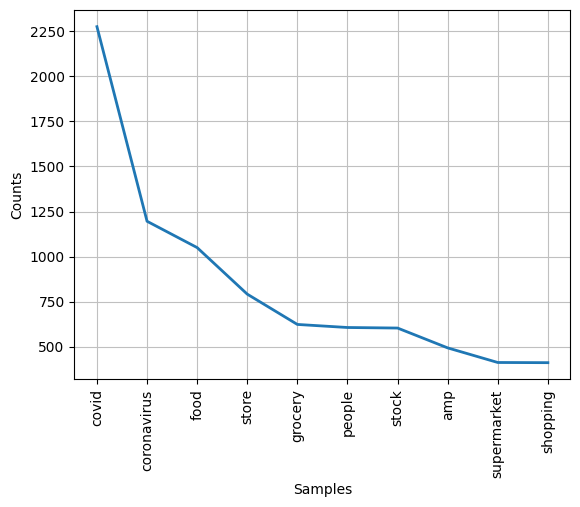

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
#Plot the graph for fdist :

plt.savefig("frequencyImg.png")
fdist.plot(10)



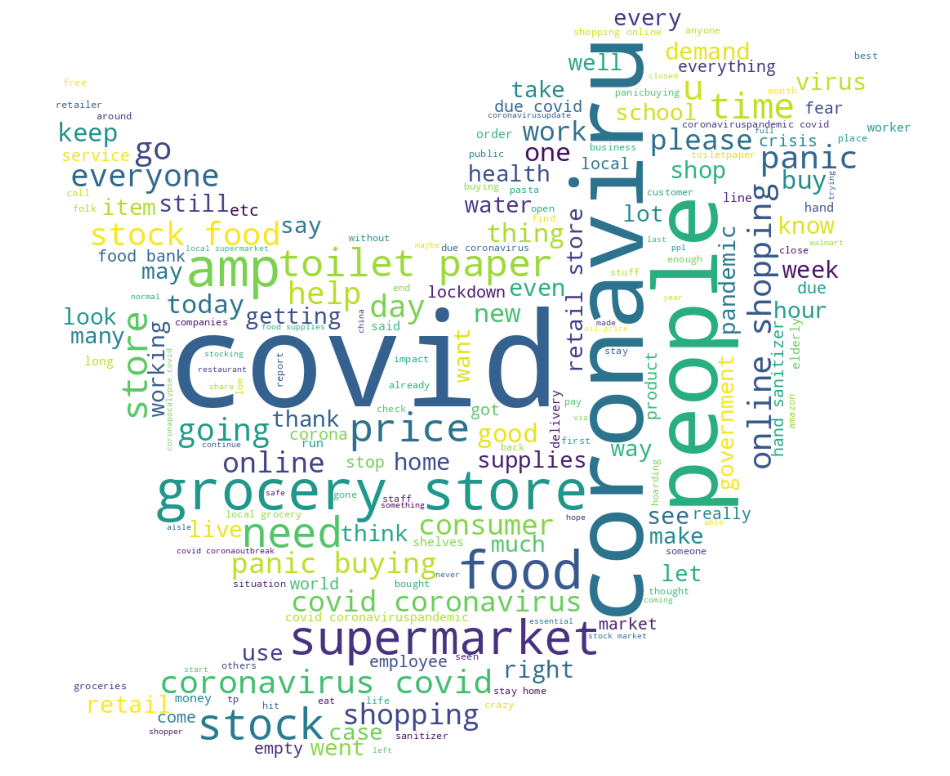

In [20]:
#Library to form wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image

#Library to plot the wordcloud
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/documents/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(OriginalTweet_para)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 

plt.savefig("WordCloud.png")
plt.show()